In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.models import Model, Sequential
from keras.layers import Dense, Input
from scipy.spatial.distance import cdist
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans


In [2]:
epoch_num = 5
sequence_length = 8  # Number of time steps to consider

# Define file and directory names
file_name = '0_61938.csv'
data_dir = 'ohlc_data'
# parent_dir = 'forexPredictor'
# repo = 'Repos_git'
# repo_dir = 'Make_Money_with_Tensorflow_2.0'
# Get the absolute base directory dynamically
base_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Move up one level

# Construct the full file path in an OS-independent way
# data_path = os.path.join(base_dir, repo, repo_dir, parent_dir, data_dir, file_name)
data_path = os.path.join(base_dir, data_dir, file_name)

# Check if the file exists before using it
if os.path.exists(data_path):
    print(f"✅ File found: {data_path}")
else:
    print(f"❌ Error: File not found at {data_path}")


ucols=['Open', 'High', 'Low', 'Close']
data_main = pd.read_csv(data_path, usecols=ucols)
data_main.reset_index(drop=True, inplace=True)
data_main.head()


✅ File found: D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\0_61938.csv


,Open,High,Low,Close
0,1.20997,1.21089,1.20966,1.20999
1,1.20481,1.20569,1.20479,1.20538
2,1.20537,1.20574,1.20341,1.20553
3,1.20556,1.20689,1.20442,1.20469
4,1.20468,1.20599,1.20380,1.20573


In [25]:
df = data_main.iloc[:-1]

<Axes: >

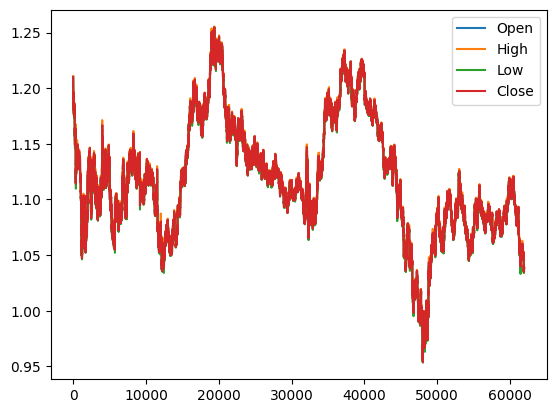

In [26]:
df.plot()

In [7]:
# Step 1: Load and preprocess data
# Assuming data is a pandas DataFrame with time-series data
time_series_data = df.values

# Normalize the data (important for time-series clustering)
scaler = TimeSeriesScalerMeanVariance()
time_series_data = scaler.fit_transform(time_series_data)

# Step 2: Train Autoencoder for feature extraction
def create_autoencoder(input_shape):
    input_layer = Input(shape=input_shape)
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(input_shape[0], activation='sigmoid')(decoded)
    
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder

# Create and train autoencoder
autoencoder = create_autoencoder((time_series_data.shape[1],))
autoencoder.fit(time_series_data, time_series_data, epochs=10, batch_size=32, validation_split=0.2)

# Use the encoder part to get the feature representations
encoder = Model(autoencoder.input, autoencoder.layers[2].output)
features = encoder.predict(time_series_data)


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6128 - val_loss: 0.5235
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5259 - val_loss: 0.5223
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5254 - val_loss: 0.5220
Epoch 4/10
250/250 [==============================] - 0s 994us/step - loss: 0.5251 - val_loss: 0.5218
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5250 - val_loss: 0.5217
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5249 - val_loss: 0.5216
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5248 - val_loss: 0.5216
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5248 - val_loss: 0.5216
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5248 - val_loss: 0.5215
Epoch 10/10
313/313 [==============================] - 0s 641us/step


In [8]:

# Step 3: Time-Series Clustering using K-Means with DTW
# Perform KMeans clustering on extracted features using DTW
n_clusters = 3  # Buy, Sell, Hold
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True)
labels = kmeans.fit_predict(features)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    2.8s finished


1.789 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    2.8s finished


1.494 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    2.9s finished


1.472 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    3.1s finished


1.468 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    3.1s finished


1.467 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    2.9s finished


1.466 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    2.9s finished


1.466 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    2.8s finished


1.466 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    2.8s finished


1.466 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    2.8s finished


1.466 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    2.7s finished


1.466 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 30000 out of 30000 | elapsed:    2.7s finished


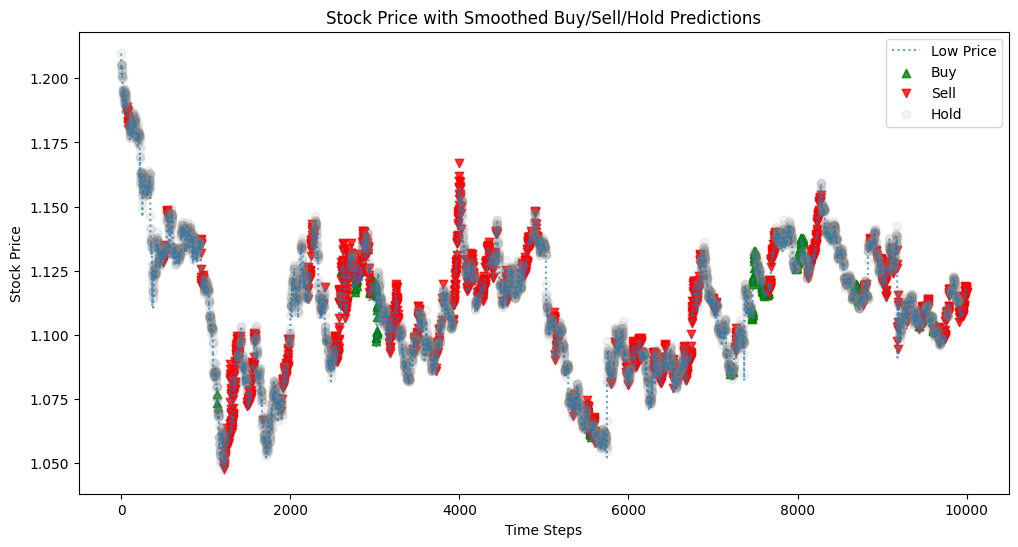


Signal Counts:
Prediction
Hold    6579
Sell    2919
Buy      502
Name: count, dtype: int64


C:\Users\Teacher\AppData\Local\Temp\ipykernel_17044\2830134947.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Prediction"] = smoothed_pred_series.map({0: "Hold", 1: "Sell", 2: "Buy"})


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Apply moving mode smoothing
def smooth_signals(labels, window_size=100):
    series = pd.Series(labels)
    smoothed = series.rolling(window_size, center=True).apply(
        lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else x.iloc[0],
        raw=True
    )
    return smoothed

# Apply smoothing to predicted classes
smoothed_pred_series = smooth_signals(labels)

# Since smoothing may introduce NaNs at the edges, align index
smoothed_pred_series.index = df.index
smoothed_pred_series = smoothed_pred_series.fillna(method='bfill').fillna(method='ffill')  # Handle edge NaNs

# Plot OHLC with Smoothed Predictions
plt.figure(figsize=(12, 6))
# plt.plot(df.index, df["Close"], label='Close Price', color='blue', linewidth=2)
# plt.plot(df.index, df["Open"], label='Open Price', linestyle='dashed', alpha=0.7)
# plt.plot(df.index, df["High"], label='High Price', linestyle='dotted', alpha=0.7)
plt.plot(df.index, df["Low"], label='Low Price', linestyle='dotted', alpha=0.7)

# Find Buy, Sell, Hold signals
buy_signals = df.index[smoothed_pred_series == 2]
sell_signals = df.index[smoothed_pred_series == 1]
hold_signals = df.index[smoothed_pred_series == 0]

# Plot Signals on Close Price
plt.scatter(buy_signals, df.loc[buy_signals, "Close"], marker='^', color='green', label='Buy', alpha=0.8)
plt.scatter(sell_signals, df.loc[sell_signals, "Close"], marker='v', color='red', label='Sell', alpha=0.8)
plt.scatter(hold_signals, df.loc[hold_signals, "Close"], marker='o', color='gray', label='Hold', alpha=0.1)

plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Stock Price with Smoothed Buy/Sell/Hold Predictions")
plt.show()

# Save Smoothed Predictions
df["Prediction"] = smoothed_pred_series.map({0: "Hold", 1: "Sell", 2: "Buy"})
df.to_csv("predicted_results_new.csv", index=False)


# Count Buy, Sell, and Hold signals
signal_counts = df["Prediction"].value_counts()

print("\nSignal Counts:")
print(signal_counts)

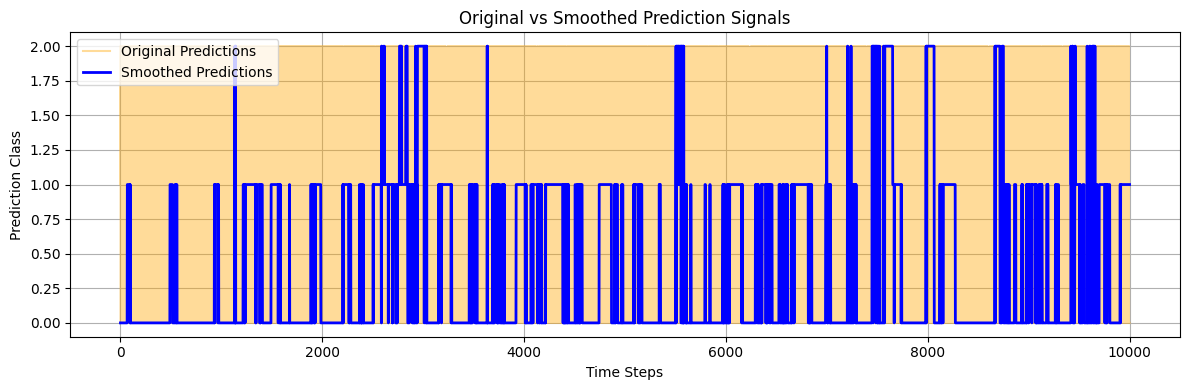

In [18]:
# Plot Original vs Smoothed Prediction Signals
plt.figure(figsize=(12, 4))
plt.plot(df.index, labels, label='Original Predictions', color='orange', alpha=0.4, linewidth=1.5)
plt.plot(df.index, smoothed_pred_series, label='Smoothed Predictions', color='blue', linewidth=2)
plt.xlabel("Time Steps")
plt.ylabel("Prediction Class")
plt.title("Original vs Smoothed Prediction Signals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Statistical indicator combinations

In [19]:
import pandas as pd
import numpy as np
from ta.momentum import RSIIndicator
from ta.trend import MACD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


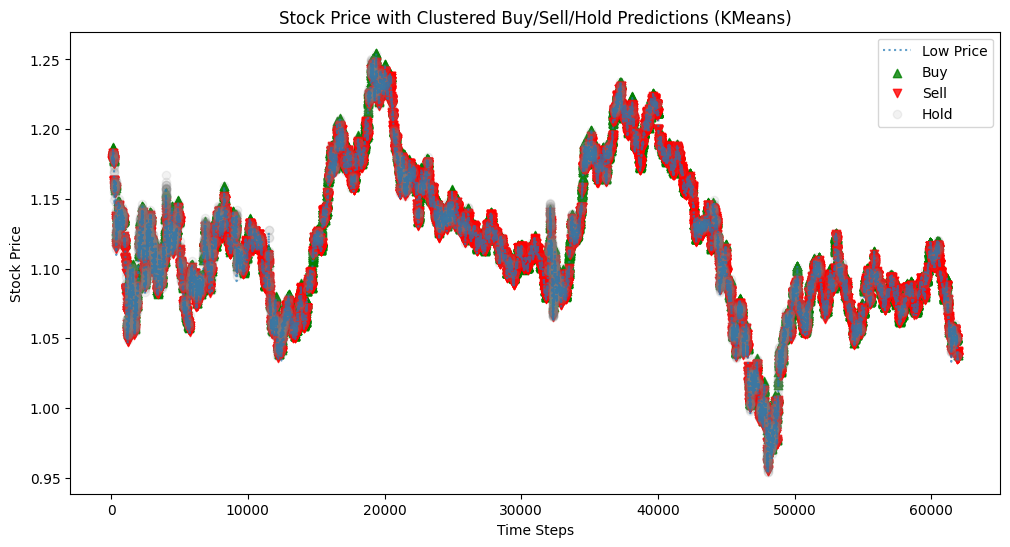


Signal Counts:
Prediction
Buy     28317
Sell    28062
Hold     5459
Name: count, dtype: int64


In [29]:
# Sort data
df = df.sort_index()

# Feature Engineering
df["return"] = (df["Close"] - df["Open"]) / df["Open"]
df["range"] = df["High"] - df["Low"]
df["candle_body"] = abs(df["Close"] - df["Open"])
df["upper_shadow"] = df["High"] - df[["Close", "Open"]].max(axis=1)
df["Lower_shadow"] = df[["Close", "Open"]].min(axis=1) - df["Low"]

# RSI and MACD
rsi = RSIIndicator(close=df["Close"], window=14)
df["rsi"] = rsi.rsi()

macd = MACD(close=df["Close"])
df["macd"] = macd.macd()
df["macd_signal"] = macd.macd_signal()
df["macd_diff"] = macd.macd_diff()

# Rolling Statistics
df["rolling_volatility"] = df["return"].rolling(10).std()
df["rolling_skew"] = df["return"].rolling(10).skew()

# Drop NaNs
df.dropna(inplace=True)

# Feature selection
features = [
    "return", "range", "candle_body", "upper_shadow", "Lower_shadow",
    "rsi", "macd", "macd_diff", "rolling_volatility", "rolling_skew"
]

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Map clusters to Buy/Sell/Hold by return
cluster_means = df.groupby("cluster")["return"].mean().sort_values()
cluster_map = {cluster_means.index[0]: "Sell", 
               cluster_means.index[1]: "Hold", 
               cluster_means.index[2]: "Buy"}

df["Prediction"] = df["cluster"].map(cluster_map)
df["signal_num"] = df["Prediction"].map({"Hold": 0, "Sell": 1, "Buy": 2})  # Numeric version for plotting

# ---------- PLOT OHLC WITH CLUSTERED SIGNALS ----------

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Low"], label='Low Price', linestyle='dotted', alpha=0.7)

# Identify signals
buy_signals = df.index[df["Prediction"] == "Buy"]
sell_signals = df.index[df["Prediction"] == "Sell"]
hold_signals = df.index[df["Prediction"] == "Hold"]

# Plot signals on Close Price
plt.scatter(buy_signals, df.loc[buy_signals, "Close"], marker='^', color='green', label='Buy', alpha=0.8)
plt.scatter(sell_signals, df.loc[sell_signals, "Close"], marker='v', color='red', label='Sell', alpha=0.8)
plt.scatter(hold_signals, df.loc[hold_signals, "Close"], marker='o', color='gray', label='Hold', alpha=0.1)

plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Stock Price with Clustered Buy/Sell/Hold Predictions (KMeans)")
plt.show()

# ---------- SAVE & REPORT ----------
# Count Buy, Sell, Hold
signal_counts = df["Prediction"].value_counts()

print("\nSignal Counts:")
print(signal_counts)


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


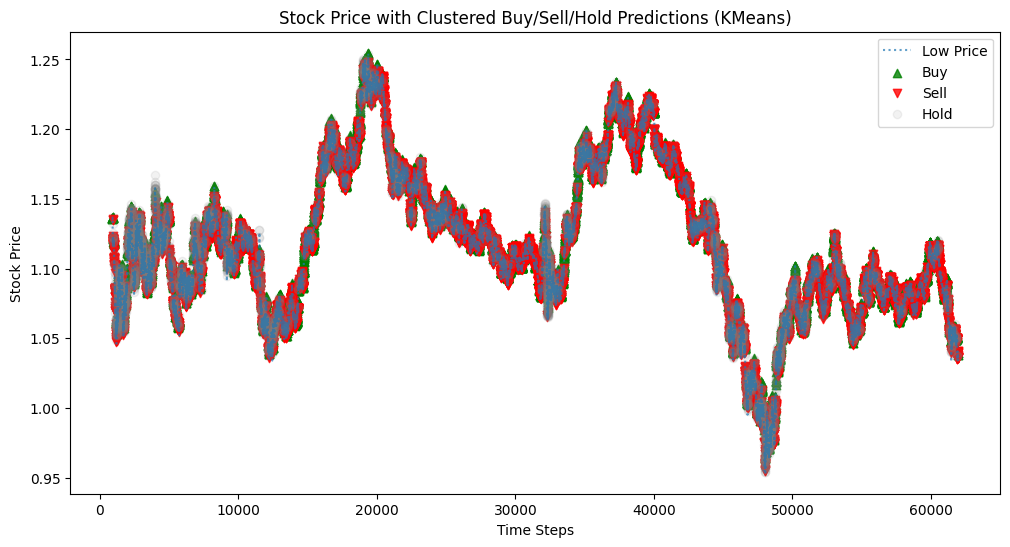


Signal Counts:
Prediction
Sell    27943
Buy     27655
Hold     5415
Name: count, dtype: int64


In [68]:
# Sort data
df = df.sort_index()

# Feature Engineering
df["return"] = (df["Close"] - df["Open"]) / df["Open"]
df["range"] = df["High"] - df["Low"]
df["candle_body"] = abs(df["Close"] - df["Open"])
df["upper_shadow"] = df["High"] - df[["Close", "Open"]].max(axis=1)
df["Lower_shadow"] = df[["Close", "Open"]].min(axis=1) - df["Low"]

# RSI and MACD
rsi = RSIIndicator(close=df["Close"], window=14)
df["rsi"] = rsi.rsi()

macd = MACD(close=df["Close"])
df["macd"] = macd.macd()
df["macd_signal"] = macd.macd_signal()
df["macd_diff"] = macd.macd_diff()

# Rolling Statistics
df["rolling_volatility"] = df["return"].rolling(10).std()
df["rolling_skew"] = df["return"].rolling(10).skew()

# Drop NaNs
df.dropna(inplace=True)

# Feature selection
features = [
    "return", "range", "candle_body", "upper_shadow", "Lower_shadow",
    "rsi", "macd", "macd_diff", "rolling_volatility", "rolling_skew"
]

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Recalculate cluster means
cluster_means = df.groupby("cluster")["return"].mean()

# Define thresholds (tune these if needed)
buy_threshold = 0.0000999
sell_threshold = -0.0000999

cluster_map = {}

for cluster, mean_return in cluster_means.items():
    if mean_return >= buy_threshold:
        cluster_map[cluster] = "Buy"
    elif mean_return <= sell_threshold:
        cluster_map[cluster] = "Sell"
    else:
        cluster_map[cluster] = "Hold"

# Apply the new mapping
df["Prediction"] = df["cluster"].map(cluster_map)
df["signal_num"] = df["Prediction"].map({"Hold": 0, "Sell": 1, "Buy": 2})


# ---------- PLOT OHLC WITH CLUSTERED SIGNALS ----------

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Low"], label='Low Price', linestyle='dotted', alpha=0.7)

# Identify signals
buy_signals = df.index[df["Prediction"] == "Buy"]
sell_signals = df.index[df["Prediction"] == "Sell"]
hold_signals = df.index[df["Prediction"] == "Hold"]

# Plot signals on Close Price
plt.scatter(buy_signals, df.loc[buy_signals, "Close"], marker='^', color='green', label='Buy', alpha=0.8)
plt.scatter(sell_signals, df.loc[sell_signals, "Close"], marker='v', color='red', label='Sell', alpha=0.8)
plt.scatter(hold_signals, df.loc[hold_signals, "Close"], marker='o', color='gray', label='Hold', alpha=0.1)

plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Stock Price with Clustered Buy/Sell/Hold Predictions (KMeans)")
plt.show()

# ---------- SAVE & REPORT ----------
# Count Buy, Sell, Hold
signal_counts = df["Prediction"].value_counts()

print("\nSignal Counts:")
print(signal_counts)


In [69]:
def smooth_signals(signal_series, window=25):
    return signal_series.rolling(window=window, center=True).apply(
        lambda x: pd.Series(x).mode().iloc[0] if not pd.Series(x).mode().empty else x.iloc[0],
        raw=False
    ).fillna(method='bfill').fillna(method='ffill')

In [70]:
# Map the signal labels to numeric values for smoothing
signal_map = {"Hold": 0, "Sell": 1, "Buy": 2}
df["signal_num"] = df["Prediction"].map(signal_map)

# Smooth the numeric signal values
df["signal_num_smooth"] = smooth_signals(df["signal_num"], window=100)

# Map back to string labels
reverse_signal_map = {0: "Hold", 1: "Sell", 2: "Buy"}
df["Prediction_smooth"] = df["signal_num_smooth"].map(reverse_signal_map)

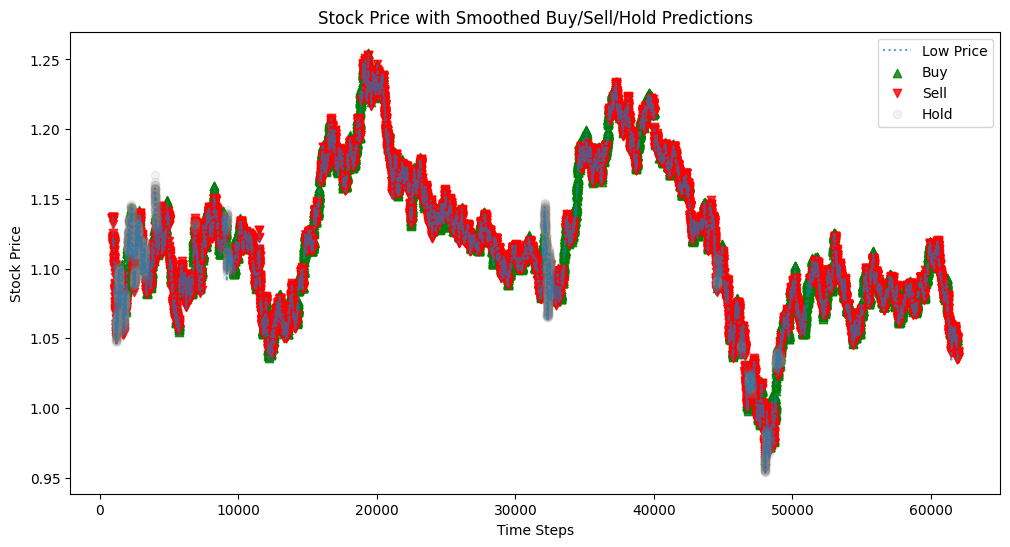

In [71]:
# Plot OHLC with Smoothed Signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Low"], label='Low Price', linestyle='dotted', alpha=0.7)

# Identify smoothed signals
buy_signals = df.index[df["Prediction_smooth"] == "Buy"]
sell_signals = df.index[df["Prediction_smooth"] == "Sell"]
hold_signals = df.index[df["Prediction_smooth"] == "Hold"]

# Plot smoothed signals on Close Price
plt.scatter(buy_signals, df.loc[buy_signals, "Close"], marker='^', color='green', label='Buy', alpha=0.8)
plt.scatter(sell_signals, df.loc[sell_signals, "Close"], marker='v', color='red', label='Sell', alpha=0.8)
plt.scatter(hold_signals, df.loc[hold_signals, "Close"], marker='o', color='gray', label='Hold', alpha=0.1)

plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Stock Price with Smoothed Buy/Sell/Hold Predictions")
plt.show()


In [72]:
# Count Buy, Sell, Hold
signal_counts = df["Prediction_smooth"].value_counts()

print("\nSignal Counts:")
print(signal_counts)



Signal Counts:
Prediction_smooth
Buy     29577
Sell    29464
Hold     1972
Name: count, dtype: int64


In [82]:
def compress_signals(signal_series):
    compressed = list(signal_series)  # Convert to list for flexible assignment
    i = 0
    while i < len(compressed):
        current = compressed[i]
        if current in ["Buy", "Sell"]:
            start = i
            while i + 1 < len(compressed) and compressed[i + 1] == current:
                i += 1
            end = i
            if end - start >= 2:
                for j in range(start + 1, end):
                    compressed[j] = "Hold"
        i += 1
    return compressed


In [84]:
df["Prediction_compressed"] = compress_signals(df["Prediction_smooth"].values)


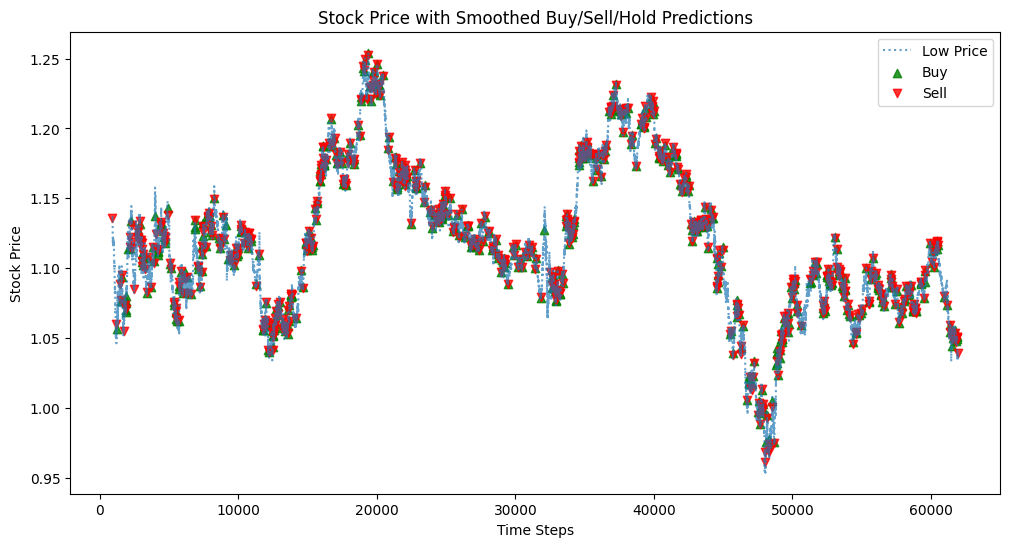

In [87]:
# Plot OHLC with Smoothed Signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Low"], label='Low Price', linestyle='dotted', alpha=0.7)

# Identify smoothed signals
buy_signals = df.index[df["Prediction_compressed"] == "Buy"]
sell_signals = df.index[df["Prediction_compressed"] == "Sell"]
hold_signals = df.index[df["Prediction_compressed"] == "Hold"]

# Plot smoothed signals on Close Price
plt.scatter(buy_signals, df.loc[buy_signals, "Close"], marker='^', color='green', label='Buy', alpha=0.8)
plt.scatter(sell_signals, df.loc[sell_signals, "Close"], marker='v', color='red', label='Sell', alpha=0.8)
# plt.scatter(hold_signals, df.loc[hold_signals, "Close"], marker='o', color='gray', label='Hold', alpha=0.1)

plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Stock Price with Smoothed Buy/Sell/Hold Predictions")
plt.show()


In [89]:
df["Prediction_compressed"].value_counts()

Prediction_compressed
Hold    59663
Sell      675
Buy       675
Name: count, dtype: int64

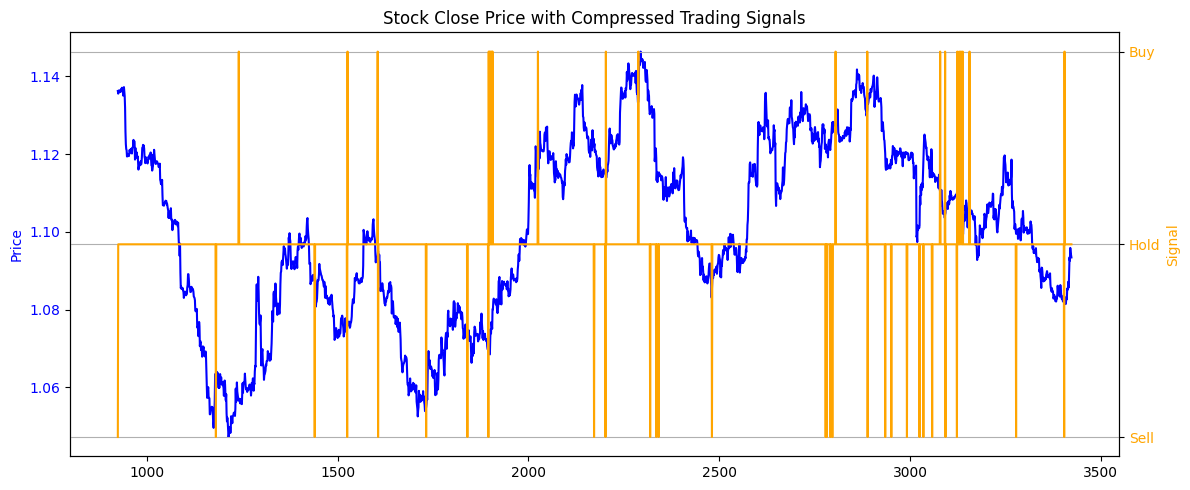

In [96]:
# Map signals to numeric for plotting
signal_map = {"Sell": -1, "Hold": 0, "Buy": 1}
numeric_signals = df["Prediction_compressed"].map(signal_map)

# Plot both Close price and signal
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Close price
ax1.plot(df["Close"][:2500], label='Close Price', color='blue')
ax1.set_ylabel("Price", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Plot signals on secondary axis
ax2 = ax1.twinx()
ax2.plot(numeric_signals[:2500], label='Signal', color='orange', linewidth=1.5)
ax2.set_yticks([-1, 0, 1])
ax2.set_yticklabels(["Sell", "Hold", "Buy"])
ax2.set_ylabel("Signal", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

plt.title("Stock Close Price with Compressed Trading Signals")
plt.grid(True)
fig.tight_layout()
plt.show()
